In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
from scipy.linalg import svd
from mpl_toolkits.mplot3d import Axes3D

import xlrd


In [2]:
disease_mat=loadmat('../project1/heart_disease.mat',squeeze_me=True);

X = disease_mat['X']
y = disease_mat['y']
M = disease_mat['M']
N = disease_mat['N']
C = disease_mat['C']
attributeNames = disease_mat['attributeNames']
classNames = disease_mat['classNames']
# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(axis=0)
Y = Y*(1/np.std(Y,0))

mean_X = X.mean(axis=0)
std_X = X.std(axis=0)
median_X = np.median(X,axis=0)
print('Matrix:',X)
print('Mean:',mean_X)
print('Standard Deviation:',std_X)
print('Median:',median_X)
print('Standlized:',Y)


Matrix: [[1.600e+02 1.200e+01 5.730e+00 ... 2.530e+01 9.720e+01 5.200e+01]
 [1.440e+02 1.000e-02 4.410e+00 ... 2.887e+01 2.060e+00 6.300e+01]
 [1.180e+02 8.000e-02 3.480e+00 ... 2.914e+01 3.810e+00 4.600e+01]
 ...
 [1.080e+02 3.000e+00 1.590e+00 ... 2.009e+01 2.664e+01 5.500e+01]
 [1.180e+02 5.400e+00 1.161e+01 ... 2.735e+01 2.397e+01 4.000e+01]
 [1.320e+02 0.000e+00 4.820e+00 ... 1.470e+01 0.000e+00 4.600e+01]]
Mean: [138.32683983   3.63564935   4.74032468  25.4067316    0.41558442
  53.1038961   26.04411255  17.04439394  42.81601732]
Standard Deviation: [20.474123    4.58805058  2.0686667   7.77227336  0.49282249  9.80690332
  4.2091175  24.45454969 14.59313732]
Median: [134.      2.      4.34   26.115   0.     53.     25.805   7.51   45.   ]
Standlized: [[ 1.05856354  1.82307289  0.47841217 ... -0.17678588  3.27773797
   0.62933573]
 [ 0.27708929 -0.79023744 -0.15967999 ...  0.67137291 -0.61274463
   1.3831147 ]
 [-0.99280637 -0.77498042 -0.60924492 ...  0.73551937 -0.5411833
   0.2

In [4]:
attributeNames

array(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'type', 'obesity',
       'alcohol', 'age'], dtype=object)

In [5]:
classNames

array(['no chd', 'chd'], dtype=object)

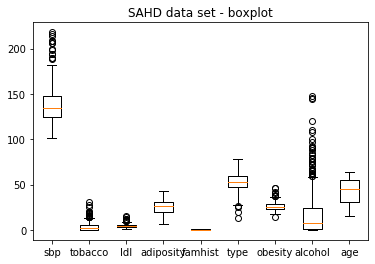

In [21]:
plt.boxplot(X)
plt.xticks(range(1,10),attributeNames)
plt.title('SAHD data set - boxplot')
plt.show()

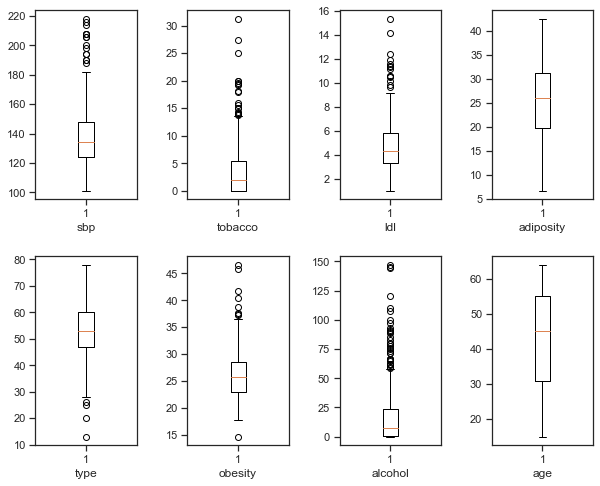

adiposity         0
age               0
alcohol          33
heart disease     0
ldl              14
obesity           9
sbp              15
tobacco          19
typea             4
dtype: int64

In [77]:
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=0.3 ,wspace=0.5) 

for i in range(0,4):
    plt.subplot(2,4,i+1)
    plt.xlabel(attributeNames[i])
    plt.boxplot(X[:,i])    
for i in range(5,9):
    plt.subplot(2,4,i)
    plt.xlabel(attributeNames[i])
    plt.boxplot(X[:,i])    
plt.show()

df = pd.read_excel('../project1/heart_disease_data1.xlsx')
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

#remove the outliers
#mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
#df[mask] = np.nan


In [78]:
df

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,heart disease
0,160,12.00,5.73,23.11,49,25.30,97.20,52,chd
1,144,0.01,4.41,28.61,55,28.87,2.06,63,chd
2,118,0.08,3.48,32.28,52,29.14,3.81,46,no chd
3,170,7.50,6.41,38.03,51,31.99,24.26,58,chd
4,134,13.60,3.50,27.78,60,25.99,57.34,49,chd
5,132,6.20,6.47,36.21,62,30.77,14.14,45,no chd
6,142,4.05,3.38,16.20,59,20.81,2.62,38,no chd
7,114,4.08,4.59,14.60,62,23.11,6.72,58,chd
8,114,0.00,3.83,19.40,49,24.86,2.49,29,no chd
9,132,0.00,5.80,30.96,69,30.11,0.00,53,chd


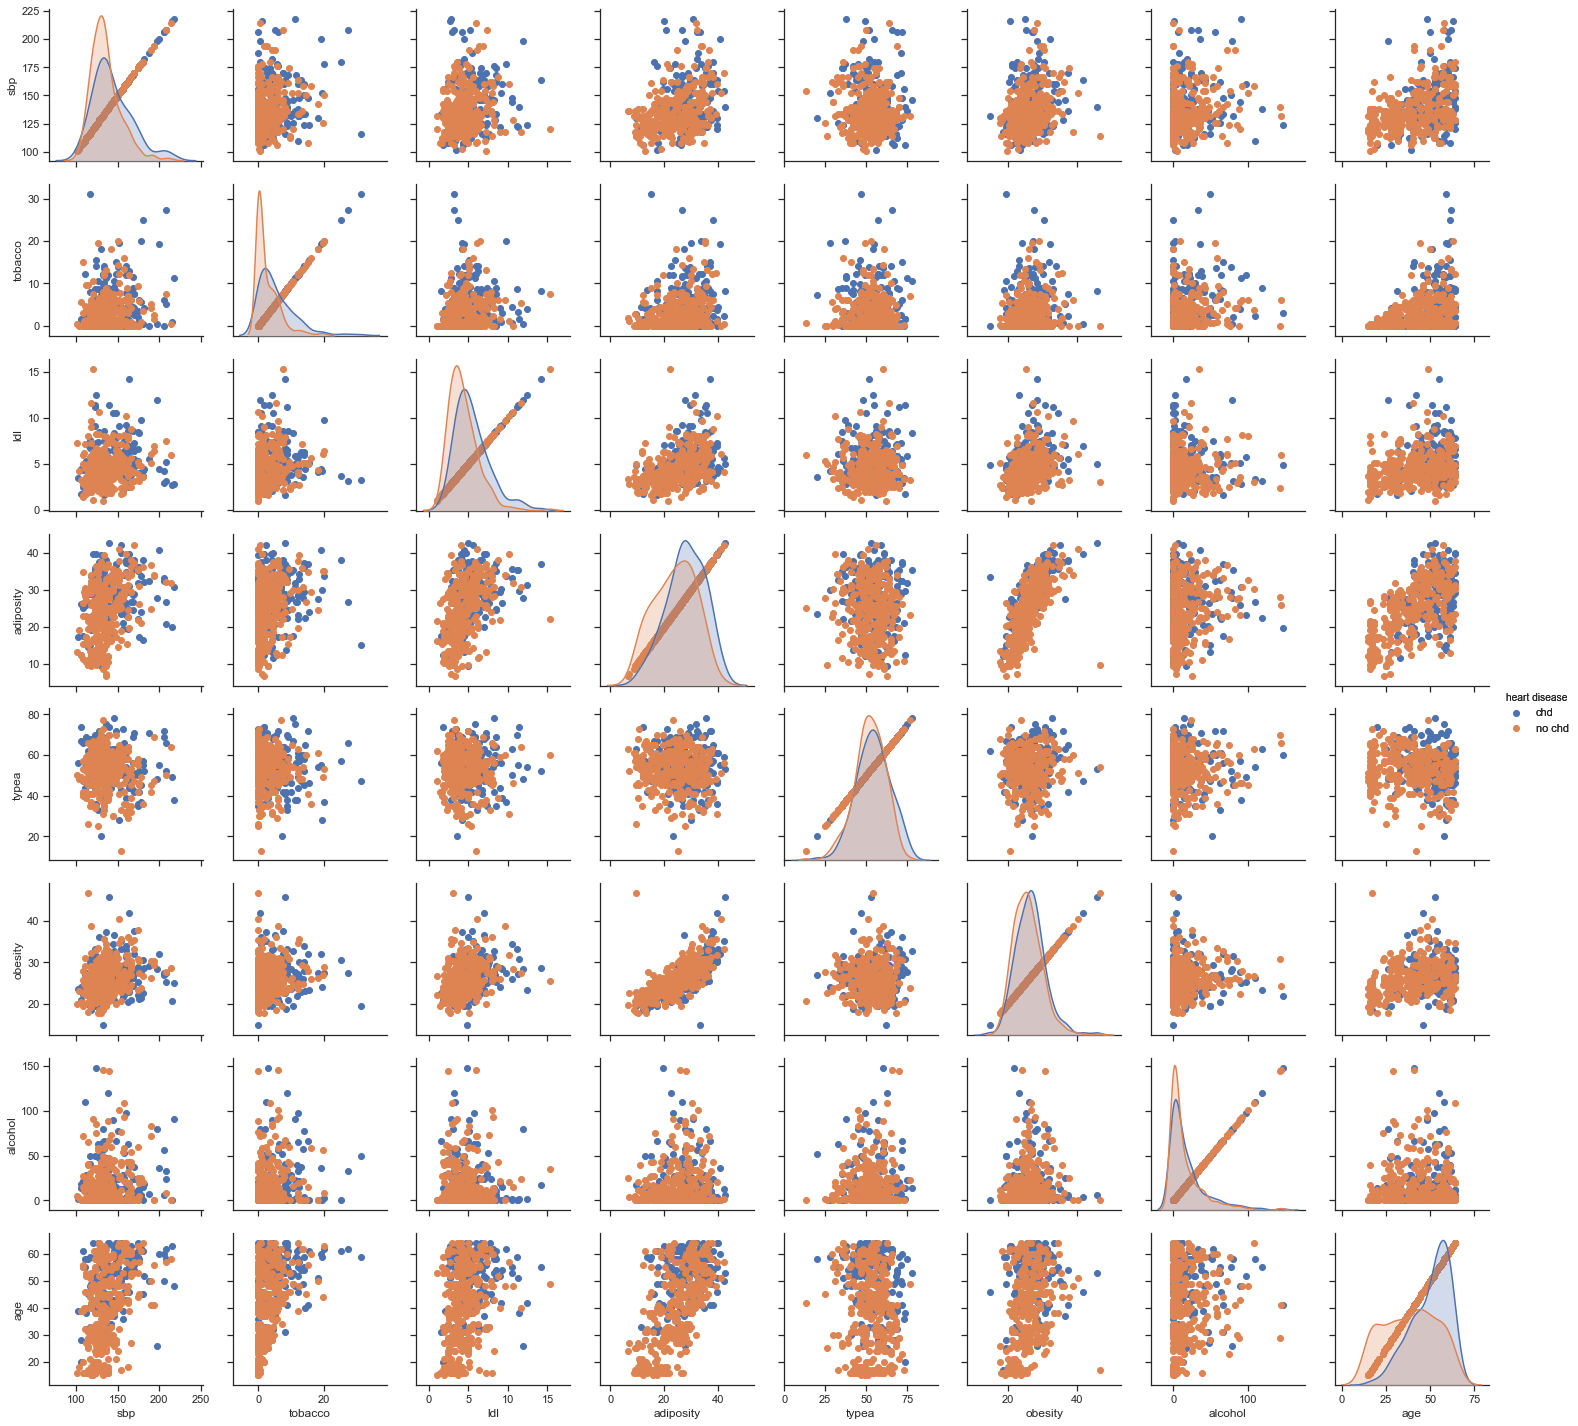

In [76]:
sns.set(style="ticks")


g = sns.pairplot(df,hue="heart disease")
g.map(plt.scatter)
g.add_legend()

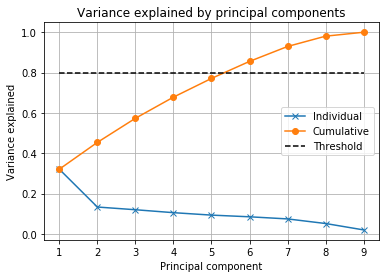

In [3]:
# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.8

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

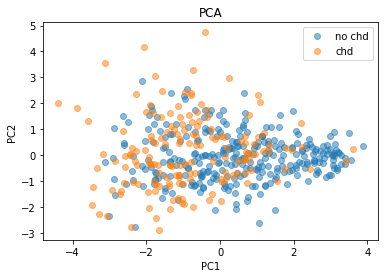

In [4]:

# PCA by computing SVD of Y
U,S,Vh = svd(Y,full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T    

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1



# Plot PCA of the data
f = plt.figure()
plt.title('PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
plt.legend(classNames)
plt.xlabel('PC{0}'.format(i+1))
plt.ylabel('PC{0}'.format(j+1))
plt.show()


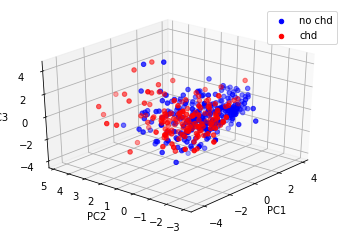

In [5]:
# 3D plot
ind = [0, 1, 2]
colors = ['blue', 'red']

f = plt.figure()
ax = f.add_subplot(111, projection='3d') #Here the mpl_toolkits is used
for c in range(C):
    class_mask = (y==c)
    s = ax.scatter(Z[class_mask,ind[0]], Z[class_mask,ind[1]], Z[class_mask,ind[2]], c=colors[c])

ax.view_init(30, 220)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(classNames)

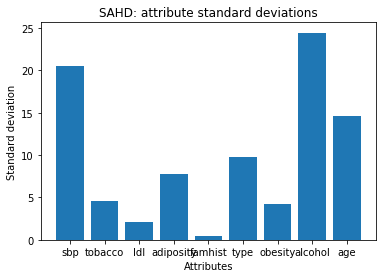

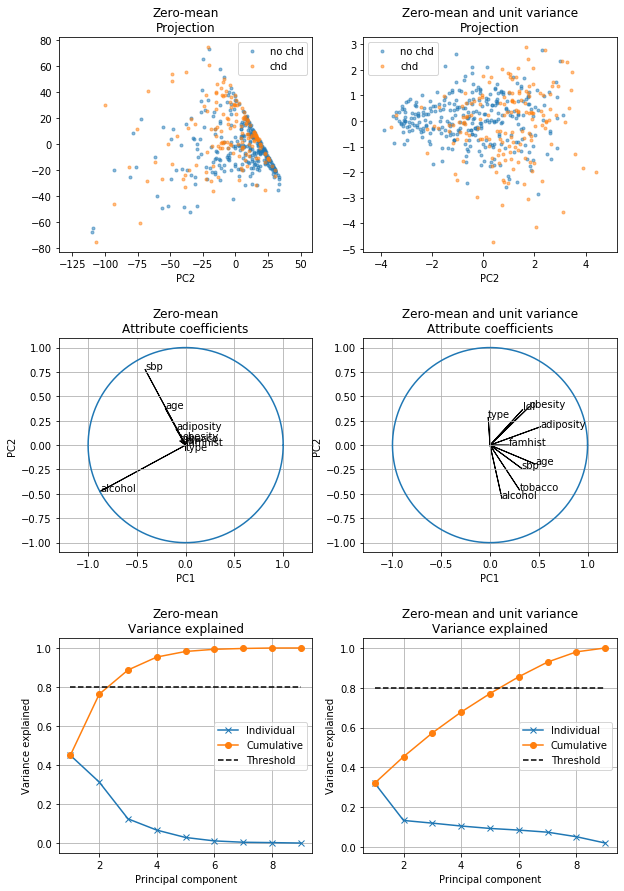

In [40]:
r = np.arange(1,X.shape[1]+1)
plt.bar(r, np.std(X,0))
plt.xticks(r, attributeNames)
plt.ylabel('Standard deviation')
plt.xlabel('Attributes')
plt.title('SAHD: attribute standard deviations')

## Investigate how standardization affects PCA

# Try this *later* (for last), and explain the effect
#X_s = X.copy() # Make a to be "scaled" version of X
#X_s[:, 2] = 100*X_s[:, 2] # Scale/multiply attribute C with a factor 100
# Use X_s instead of X to in the script below to see the difference.
# Does it affect the two columns in the plot equally?


# Subtract the mean from the data
Y1 = X - np.ones((N, 1))*X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1))*X.mean(0)
Y2 = Y2*(1/np.std(Y2,0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions 
# of Y2

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]
titles = ['Zero-mean', 'Zero-mean and unit variance']
threshold = 0.8
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.4)
plt.title('SAHD: Effect of standardization')
nrows=3
ncols=2
for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U,S,Vh = svd(Ys[k],full_matrices=False)
    V=Vh.T # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k==1: V = -V; U = -U; 
    
    # Compute variance explained
    rho = (S*S) / (S*S).sum() 
    
    # Compute the projection onto the principal components
    Z = U*S;
    
    # Plot projection
    plt.subplot(nrows, ncols, 1+k)
    C = len(classNames)
    for c in range(C):
        plt.plot(Z[y==c,i], Z[y==c,j], '.', alpha=.5)
    plt.xlabel('PC'+str(i+1))
    plt.xlabel('PC'+str(j+1))
    plt.title(titles[k] + '\n' + 'Projection' )
    plt.legend(classNames)
    plt.axis('equal')
    
    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols,  3+k)
    for att in range(V.shape[1]):
        plt.arrow(0,0, V[att,i], V[att,j])
        plt.text(V[att,i], V[att,j], attributeNames[att])
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.grid()
    # Add a unit circle
    plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)));
    plt.title(titles[k] +'\n'+'Attribute coefficients')
    plt.axis('equal')
            
    # Plot cumulative variance explained
    plt.subplot(nrows, ncols,  5+k);
    plt.plot(range(1,len(rho)+1),rho,'x-')
    plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
    plt.plot([1,len(rho)],[threshold, threshold],'k--')
    plt.title('Variance explained by principal components');
    plt.xlabel('Principal component');
    plt.ylabel('Variance explained');
    plt.legend(['Individual','Cumulative','Threshold'])
    plt.grid()
    plt.title(titles[k]+'\n'+'Variance explained')

plt.show()

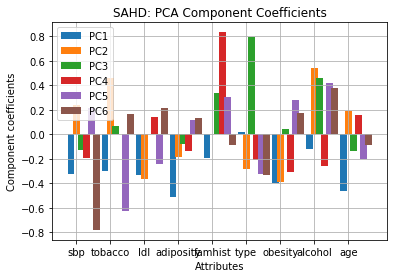

The principal directions:
[[-0.32375128  0.23829995 -0.12509476 -0.19635634  0.21490685 -0.78137544]
 [-0.30183439  0.45850912  0.06815164  0.00535626 -0.62358275  0.16310722]
 [-0.33392218 -0.3639135   0.00310419  0.14029199 -0.24222488  0.21529068]
 [-0.51629643 -0.18761714 -0.08187389 -0.13503614  0.11889455  0.13086682]
 [-0.19514307  0.0013409   0.33843911  0.833435    0.30539646 -0.08572183]
 [ 0.0183216  -0.28218155  0.79229308 -0.20984601 -0.32098457 -0.33186765]
 [-0.40147338 -0.39190548  0.04019021 -0.3054632   0.28338297  0.17363053]
 [-0.12142135  0.54301526  0.4591334  -0.25846716  0.41901697  0.37929423]
 [-0.46008104  0.19304296 -0.1352982   0.15727876 -0.19992891 -0.08874795]]
PC1:
[-0.32375128 -0.30183439 -0.33392218 -0.51629643 -0.19514307  0.0183216
 -0.40147338 -0.12142135 -0.46008104]
Z
[[-1.75579882  3.0598006   1.49995808  0.29087191  0.63362413  0.72844946]
 [-0.6740346  -0.70004828 -0.69645142 -0.70925395 -0.0226061  -0.55631213]
 [-0.26123479 -1.04277735  0.06

In [19]:
U,S,Vh = svd(Y,full_matrices=False)
V=Vh.T
N,M = X.shape

# We saw that the first 6 components explaiend more than 80
# percent of the variance. Let's look at their coefficients:
pcs = [0,1,2,3,4,5]
Vk=V[:,:6]

Z = Y @ Vk

legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .15
r = np.arange(1,M+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=.2)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('SAHD: PCA Component Coefficients')
plt.show()

print('The principal directions:')
print(Vk)
print('PC1:')
print(V[:,0])
print('Z')
print(Z)